Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

It is a multi-label classification problem.

In [50]:
# install required packages
!pip install scikit-multilearn

In [51]:
# import libraries

# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# ML Pkgs

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Split Dataset into Train and Text

from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Multi Label Pkgs

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

# Data Extraction - fetch the data from the source

Importing and loading the dataset into the dataframe

In [52]:
features= pd.read_csv('/content/training_set_features.csv')
labels= pd.read_csv('/content/training_set_labels.csv')
data= pd.concat((features,labels), ignore_index=True)

Exploratory Data Analysis

In [53]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [54]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [55]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,NaN,NaN
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,NaN,NaN
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,NaN,NaN


In [56]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
respondent_id,53414.0,13353.000000,7709.718984,0.0,6676.25,13353.0,20029.75,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.00,2.0,2.00,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.00,1.0,1.00,1.0


Dimensions of the data

In [57]:
features.shape

(26707, 36)

In [58]:
labels.shape

(26707, 3)

There are 36 features so either we should do PCA or feature selection.

In [59]:
data.shape

(53414, 38)

What are the data types?

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [61]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

We need to encode the object to int

In [62]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


Any missing values in dataset?

In [63]:
data.isnull().sum()/ len(data)*100

,0
respondent_id,0.000000
h1n1_concern,50.172239
h1n1_knowledge,50.217172
behavioral_antiviral_meds,50.132924
behavioral_avoidance,50.389411
behavioral_face_mask,50.035571
behavioral_wash_hands,50.078631
behavioral_large_gatherings,50.162879
behavioral_outside_home,50.153518
behavioral_touch_face,50.239638


In [64]:
data.isnull().sum()

,0
respondent_id,0
h1n1_concern,26799
h1n1_knowledge,26823
behavioral_antiviral_meds,26778
behavioral_avoidance,26915
behavioral_face_mask,26726
behavioral_wash_hands,26749
behavioral_large_gatherings,26794
behavioral_outside_home,26789
behavioral_touch_face,26835


Except for respondent_id, all the other features have missing data values

# Data pre-process

Check for duplicates

In [65]:
data.duplicated().sum()

0

No duplicate data in dataset

(Not going to do this anymore)
Imputation of the missing values:

In statistics, imputation is the process of replacing missing data with substituted values. When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation"

In [66]:
# Categorical data

for column in ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']: data[column].fillna(data[column].mode()[0], inplace=True)

In [67]:
# Numeric data

impute=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1'
        ,'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance','opinion_h1n1_vacc_effective'
        ,'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',
        'household_adults','household_children','h1n1_vaccine','seasonal_vaccine']

for i in impute: data[i].fillna(data[i].median(),inplace=True)

Re-check for missing values

In [68]:
data.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 53414 non-null  float64
 2   h1n1_knowledge               53414 non-null  float64
 3   behavioral_antiviral_meds    53414 non-null  float64
 4   behavioral_avoidance         53414 non-null  float64
 5   behavioral_face_mask         53414 non-null  float64
 6   behavioral_wash_hands        53414 non-null  float64
 7   behavioral_large_gatherings  53414 non-null  float64
 8   behavioral_outside_home      53414 non-null  float64
 9   behavioral_touch_face        53414 non-null  float64
 10  doctor_recc_h1n1             53414 non-null  float64
 11  doctor_recc_seasonal         53414 non-null  float64
 12  chronic_med_condition        53414 non-null  float64
 13  child_under_6_mo

All null values imputed

Unique values for features

In [70]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

AGE_GROUP :  5
age_group
35 - 44 Years     3848
18 - 34 Years     5215
45 - 54 Years     5238
55 - 64 Years     5563
65+ Years        33550
Name: count, dtype: int64


EDUCATION :  4
education
< 12 Years           2363
12 Years             5797
Some College         7043
College Graduate    38211
Name: count, dtype: int64


RACE :  4
race
Other or Multiple     1612
Hispanic              1755
Black                 2118
White                47929
Name: count, dtype: int64


SEX :  2
sex
Male      10849
Female    42565
Name: count, dtype: int64


INCOME_POVERTY :  3
income_poverty
Below Poverty                 2697
> $75,000                     6810
<= $75,000, Above Poverty    43907
Name: count, dtype: int64


MARITAL_STATUS :  2
marital_status
Not Married    11744
Married        41670
Name: count, dtype: int64


RENT_OR_OWN :  2
rent_or_own
Rent     5929
Own     47485
Name: count, dtype: int64


EMPLOYMENT_STATUS :  3
employment_status
Unemployed             1453
Not in Labor Force    10

:Make 2 lists, one for catergorical and one for numerical
If data type is object -> category, else numerical

In [71]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine']


Encoding the object

In [72]:
enc = LabelEncoder()

For dataset

In [73]:
data.age_group = enc.fit_transform(data.age_group)
data.education = enc.fit_transform(data.education)
data.race = enc.fit_transform(data.race)
data.sex = enc.fit_transform(data.sex)
data.income_poverty = enc.fit_transform(data.income_poverty)
data.marital_status = enc.fit_transform(data.marital_status)
data.rent_or_own = enc.fit_transform(data.rent_or_own)
data.employment_status = enc.fit_transform(data.employment_status)
data.hhs_geo_region = enc.fit_transform(data.hhs_geo_region)
data.census_msa = enc.fit_transform(data.census_msa)
data.employment_industry = enc.fit_transform(data.employment_industry)
data.employment_occupation = enc.fit_transform(data.employment_occupation)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 53414 non-null  float64
 2   h1n1_knowledge               53414 non-null  float64
 3   behavioral_antiviral_meds    53414 non-null  float64
 4   behavioral_avoidance         53414 non-null  float64
 5   behavioral_face_mask         53414 non-null  float64
 6   behavioral_wash_hands        53414 non-null  float64
 7   behavioral_large_gatherings  53414 non-null  float64
 8   behavioral_outside_home      53414 non-null  float64
 9   behavioral_touch_face        53414 non-null  float64
 10  doctor_recc_h1n1             53414 non-null  float64
 11  doctor_recc_seasonal         53414 non-null  float64
 12  chronic_med_condition        53414 non-null  float64
 13  child_under_6_mo

For features only

In [75]:
features.age_group = enc.fit_transform(features.age_group)
features.education = enc.fit_transform(features.education)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_poverty = enc.fit_transform(features.income_poverty)
features.marital_status = enc.fit_transform(features.marital_status)
features.rent_or_own = enc.fit_transform(features.rent_or_own)
features.employment_status = enc.fit_transform(features.employment_status)
features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
features.census_msa = enc.fit_transform(features.census_msa)
features.employment_industry = enc.fit_transform(features.employment_industry)
features.employment_occupation = enc.fit_transform(features.employment_occupation)

In [76]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [77]:
data.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,8,2,0.0,0.0,4,21,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0.0,0.0,12,19,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,9,0,2.0,0.0,14,21,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,5,1,0.0,0.0,4,21,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,9,0,1.0,0.0,18,5,0.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,2.0,3.0,15,18,0.0,0.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,9,0,0.0,0.0,19,21,0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,2,2.0,0.0,12,20,0.0,0.0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,1,0,1.0,0.0,19,1,0.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,9,0,0.0,0.0,4,21,0.0,0.0


# Data Analysis

Describe the columns for numerical and categorical

In [78]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,53414.0,13353.000000,7709.718984,0.0,6676.25,13353.0,20029.75,26706.0
h1n1_concern,53414.0,1.809900,0.670288,0.0,2.00,2.0,2.00,3.0
h1n1_knowledge,53414.0,1.130696,0.455469,0.0,1.00,1.0,1.00,2.0
behavioral_antiviral_meds,53414.0,0.024357,0.154156,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,53414.0,0.863875,0.342925,0.0,1.00,1.0,1.00,1.0
behavioral_face_mask,53414.0,0.034467,0.182426,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,53414.0,0.912944,0.281919,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,53414.0,0.178736,0.383135,0.0,0.00,0.0,0.00,1.0
behavioral_outside_home,53414.0,0.168139,0.373994,0.0,0.00,0.0,0.00,1.0
behavioral_touch_face,53414.0,0.839405,0.367160,0.0,1.00,1.0,1.00,1.0


In [79]:
data[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
age_group,53414.0,3.093065,1.372741,0.0,2.0,4.0,4.0,4.0
education,53414.0,1.870558,0.770370,0.0,2.0,2.0,2.0,3.0
race,53414.0,2.785150,0.687260,0.0,3.0,3.0,3.0,3.0
sex,53414.0,0.203112,0.402319,0.0,0.0,0.0,0.0,1.0
income_poverty,53414.0,0.228479,0.526561,0.0,0.0,0.0,0.0,2.0
marital_status,53414.0,0.219867,0.414161,0.0,0.0,0.0,0.0,1.0
rent_or_own,53414.0,0.111001,0.314136,0.0,0.0,0.0,0.0,1.0
employment_status,53414.0,0.245947,0.489762,0.0,0.0,0.0,0.0,2.0
hhs_geo_region,53414.0,5.414873,2.068593,0.0,5.0,6.0,6.0,9.0
census_msa,53414.0,0.416745,0.715958,0.0,0.0,0.0,1.0,2.0


In [80]:
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,...,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000
mean,13353.000000,1.809900,1.130696,0.024357,0.863875,0.034467,0.912944,0.178736,0.168139,0.839405,...,0.111001,0.245947,5.414873,0.416745,0.943779,0.264799,5.393155,18.669169,0.106227,0.232804
std,7709.718984,0.670288,0.455469,0.154156,0.342925,0.182426,0.281919,0.383135,0.373994,0.367160,...,0.314136,0.489762,2.068593,0.715958,0.533283,0.705811,4.113843,5.321768,0.308131,0.422622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.250000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,4.000000,21.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,4.000000,21.000000,0.000000,0.000000
75%,20029.750000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,4.000000,21.000000,0.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,9.000000,2.000000,3.000000,3.000000,20.000000,22.000000,1.000000,1.000000


Finding the outliers in dataset

In [81]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)

    return np.array(outliers)

In [82]:
print(len(findoutliers(features.household_adults)))
print(len(findoutliers(features.household_children)))

1125
1747


In [83]:
findoutliers(features.household_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [84]:
findoutliers(features.household_children)

array([3., 3., 3., ..., 3., 3., 3.])

Visualize the outliers

<Axes: ylabel='household_adults'>

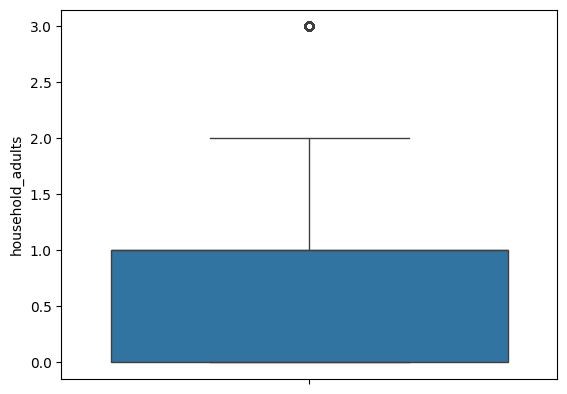

In [85]:
sns.boxplot(features.household_adults)

<Axes: ylabel='household_children'>

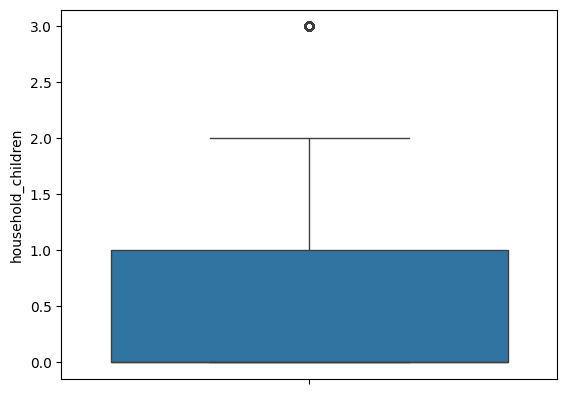

In [86]:
sns.boxplot(features.household_children)

Keep outliers in for now

<Axes: xlabel='doctor_recc_seasonal'>

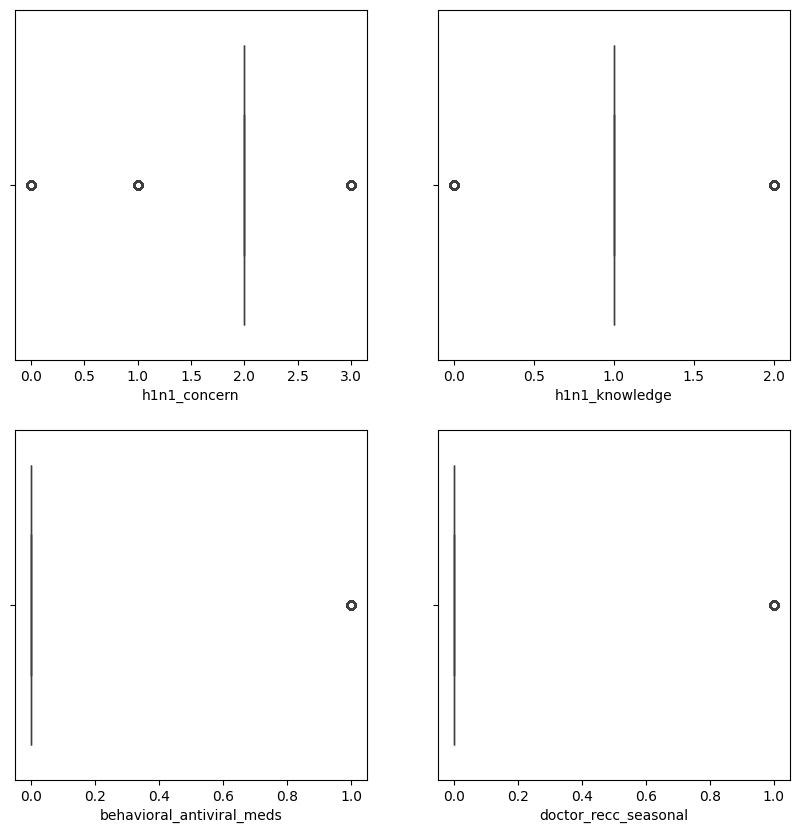

In [87]:
# construct box plot for continuous variables
fig ,ax  =  plt.subplots(2,2, figsize  =(10,10) )
sns.boxplot(x='h1n1_concern', data= data , ax= ax[0,0])
sns.boxplot(x='h1n1_knowledge', data= data , ax= ax[0,1])
sns.boxplot(x='behavioral_antiviral_meds', data= data , ax= ax[1,0])
sns.boxplot(x='doctor_recc_seasonal', data= data , ax= ax[1,1])

Visualising numerical data

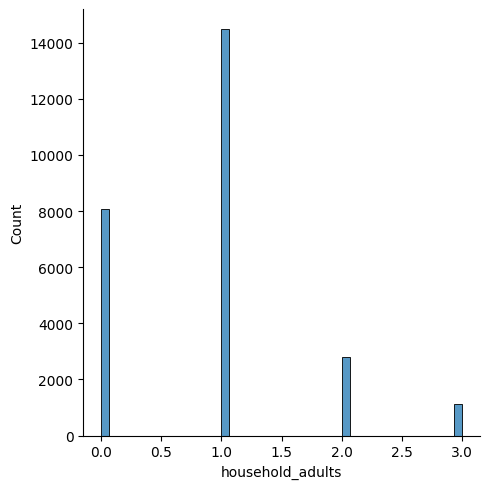

In [88]:
sns.displot(features.household_adults)

Household_adults are mostly 1

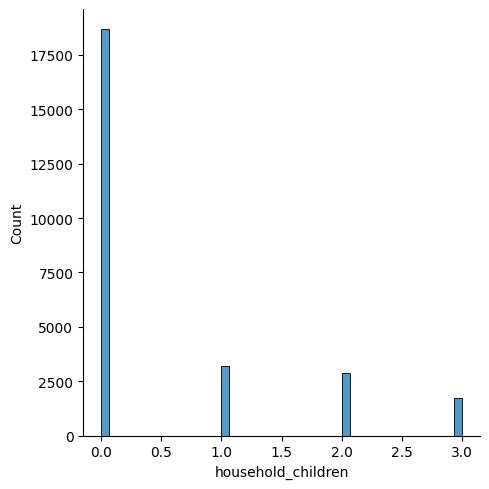

In [89]:
sns.displot(features.household_children)

Same, household_children are mostly 0

Visualising categorical data

What are h1n1 concerns looking like?

In [90]:
features.h1n1_concern.value_counts()

,count
h1n1_concern,
2.0,10575
1.0,8153
3.0,4591
0.0,3296


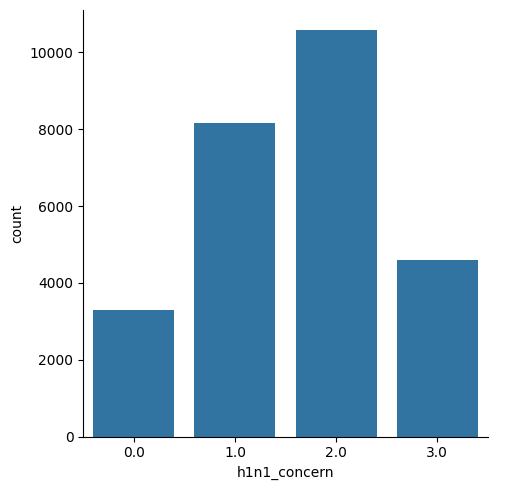

In [91]:
sns.catplot(x='h1n1_concern', data=features, kind="count")

More people concerned about h1n1 vaccine

how much knowledge do people have on h1n1?

In [92]:
features.h1n1_knowledge.value_counts()

,count
h1n1_knowledge,
1.0,14598
2.0,9487
0.0,2506


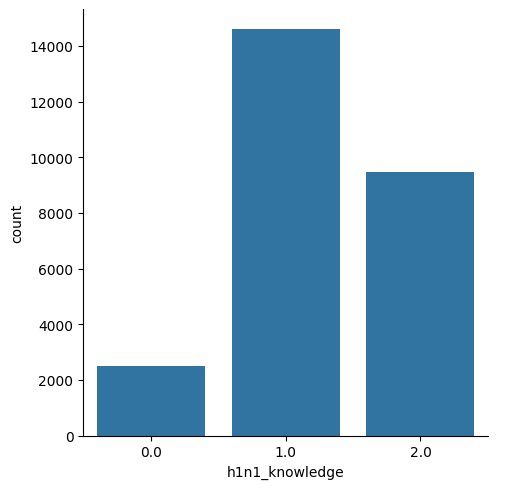

In [93]:
sns.catplot(x='h1n1_knowledge', data=features, kind="count")

Most people have little or lots of knowledge about h1n1 vaccine

take antiviral meds?

In [94]:
features.behavioral_antiviral_meds.value_counts()

,count
behavioral_antiviral_meds,
0.0,25335
1.0,1301


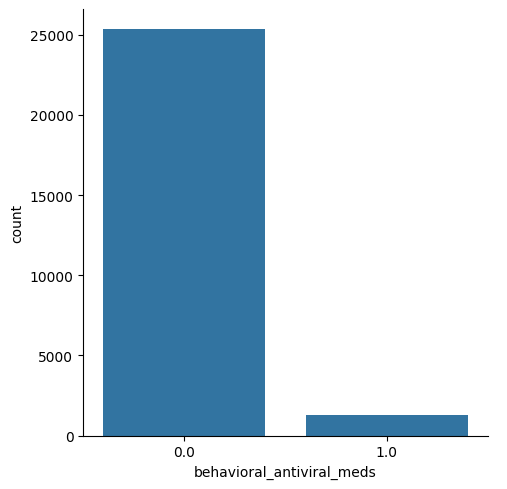

In [95]:
sns.catplot(x='behavioral_antiviral_meds', data = features, kind = "count")

Almost all of the people take no behavioral_antiviral_meds

In [96]:
features.behavioral_avoidance.value_counts()

,count
behavioral_avoidance,
1.0,19228
0.0,7271


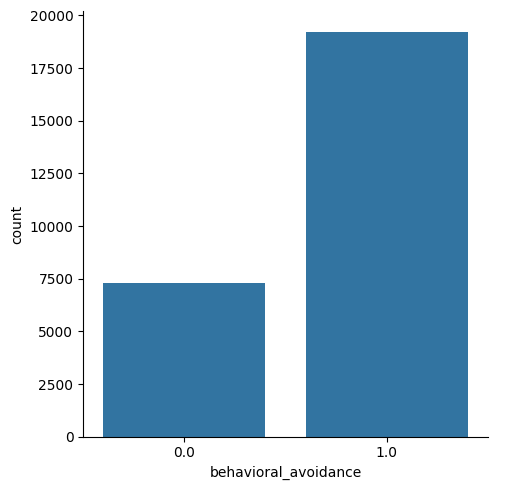

In [97]:
sns.catplot(x='behavioral_avoidance', data = features, kind = "count")

~72% of people have avoided contact with people with symptoms

In [98]:
features.behavioral_face_mask.value_counts()

,count
behavioral_face_mask,
0.0,24847
1.0,1841


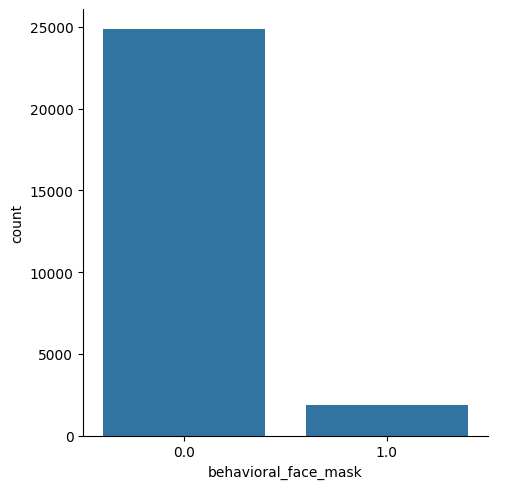

In [99]:
sns.catplot(x='behavioral_face_mask', data = features, kind = "count")

Few people have face_mask, many others do not have/not use it

In [100]:
features.behavioral_wash_hands.value_counts()

,count
behavioral_wash_hands,
1.0,22015
0.0,4650


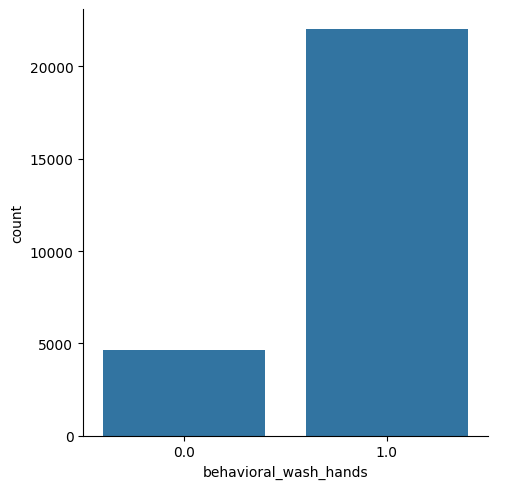

In [101]:
sns.catplot(x='behavioral_wash_hands', data = features, kind = "count")

~83% of people wash hands

In [102]:
features.doctor_recc_h1n1.value_counts()

,count
doctor_recc_h1n1,
0.0,19139
1.0,5408


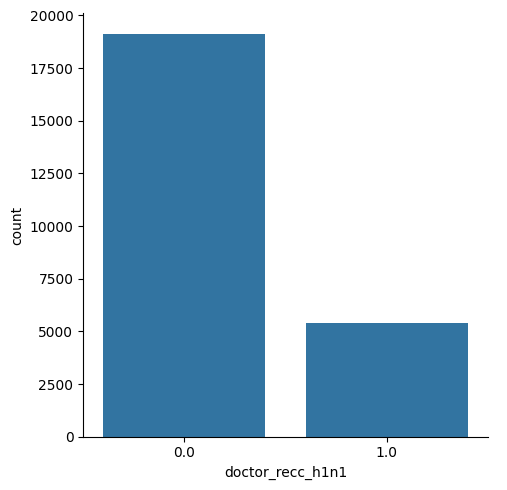

In [103]:
sns.catplot(x='doctor_recc_h1n1', data = features, kind = "count")

Doctor reccommending h1n1 vaccine to ~22% of people

In [104]:
features.doctor_recc_seasonal.value_counts()

,count
doctor_recc_seasonal,
0.0,16453
1.0,8094


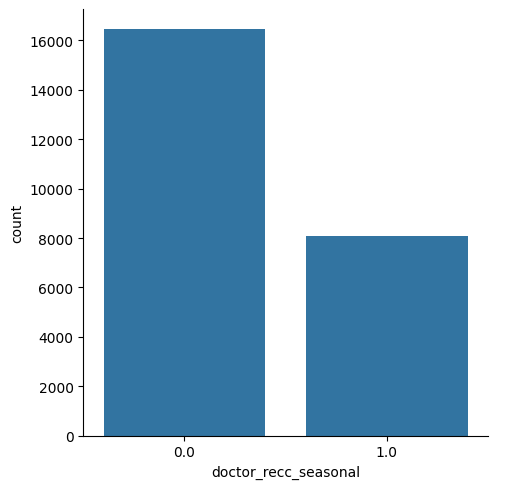

In [105]:
sns.catplot(x='doctor_recc_seasonal', data = features, kind = "count")

Doctor reccommending seasonal(flu) vaccine to ~33% of people

In [106]:
features.chronic_med_condition .value_counts()

,count
chronic_med_condition,
0.0,18446
1.0,7290


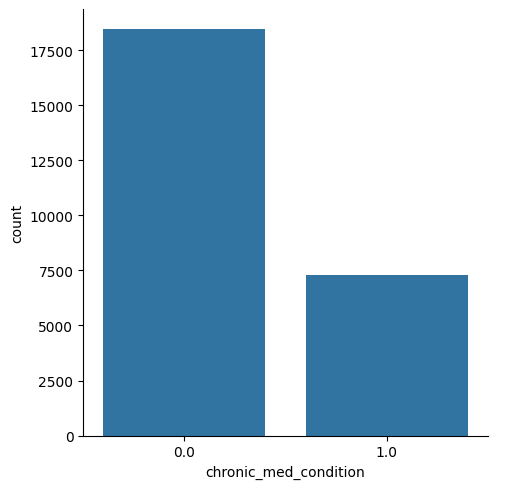

In [107]:
sns.catplot(x='chronic_med_condition', data = features, kind = "count")

~28% of people have chronic medical conditions

In [108]:
features.child_under_6_months.value_counts()

,count
child_under_6_months,
0.0,23749
1.0,2138


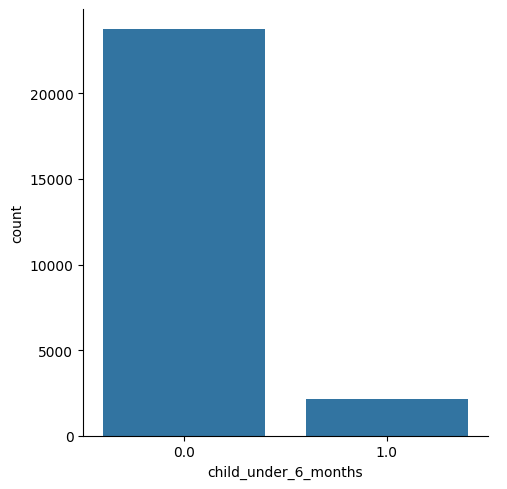

In [109]:
sns.catplot(x='child_under_6_months', data = features, kind = "count")

Few people had close contact with a child under 6 months

In [110]:
features.health_worker.value_counts()

,count
health_worker,
0.0,23004
1.0,2899


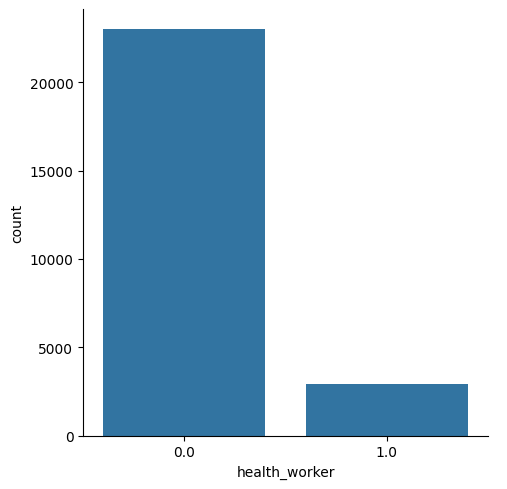

In [111]:
sns.catplot(x='health_worker', data = features, kind = "count")

Very few work in healthcare, affecting knowledge and opinion

In [112]:
features.health_insurance.value_counts()

,count
health_insurance,
1.0,12697
0.0,1736


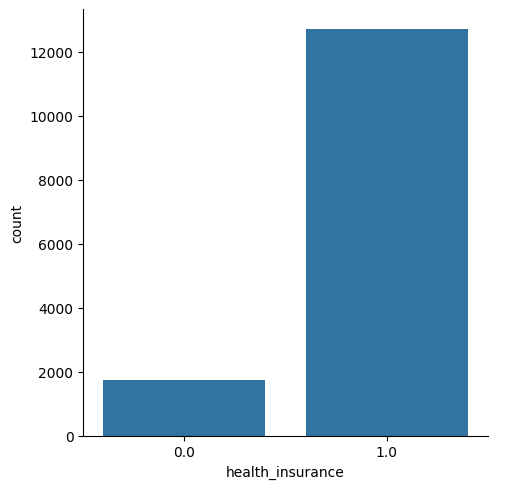

In [113]:
sns.catplot(x='health_insurance', data = features, kind = "count")

Many have health insurance, ~12% do not have insurance. Affects coverage for vaccinations.

In [114]:
features.opinion_h1n1_vacc_effective.value_counts()

,count
opinion_h1n1_vacc_effective,
4.0,11683
5.0,7166
3.0,4723
2.0,1858
1.0,886


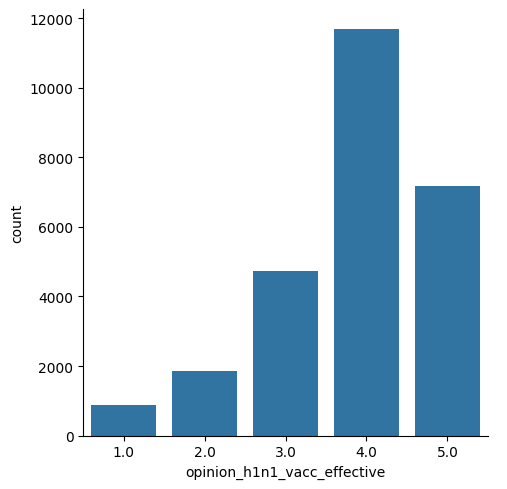

In [115]:
sns.catplot(x='opinion_h1n1_vacc_effective', data = features, kind = "count")

Most think h1n1 vaccine is somewhat effective

In [116]:
features.opinion_h1n1_risk.value_counts()

,count
opinion_h1n1_risk,
2.0,9919
1.0,8139
4.0,5394
5.0,1750
3.0,1117


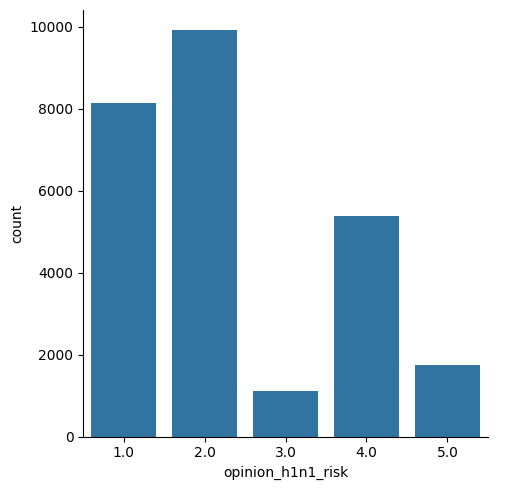

In [117]:
sns.catplot(x='opinion_h1n1_risk', data = features, kind = "count")

Most are of the opinon that the h1n1 vaccine has somewhat low or very low risk.

In [118]:
features.opinion_h1n1_sick_from_vacc.value_counts()

,count
opinion_h1n1_sick_from_vacc,
2.0,9129
1.0,8998
4.0,5850
5.0,2187
3.0,148


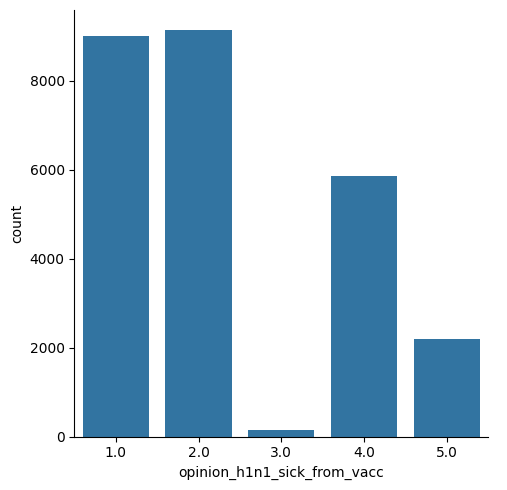

In [119]:
sns.catplot(x='opinion_h1n1_sick_from_vacc', data = features, kind = "count")

Most people are not at all worried or not very worried of getting sick from h1n1 vaccine.

In [120]:
features.opinion_seas_vacc_effective.value_counts()

,count
opinion_seas_vacc_effective,
4.0,11629
5.0,9973
2.0,2206
1.0,1221
3.0,1216


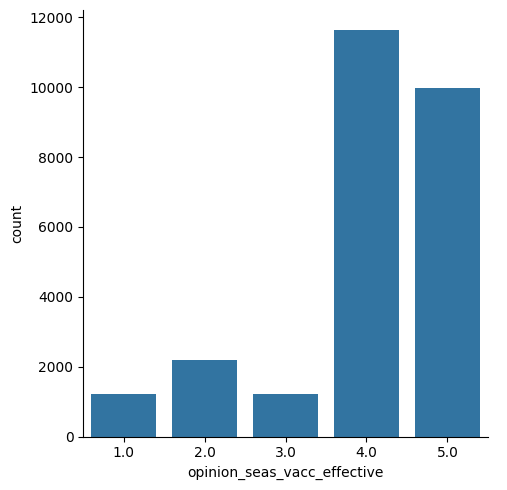

In [121]:
sns.catplot(x='opinion_seas_vacc_effective', data = features, kind = "count")

Most people think seasonal vaccine is somewhat or very effective.

In [122]:
features.opinion_seas_risk.value_counts()

,count
opinion_seas_risk,
2.0,8954
4.0,7630
1.0,5974
5.0,2958
3.0,677


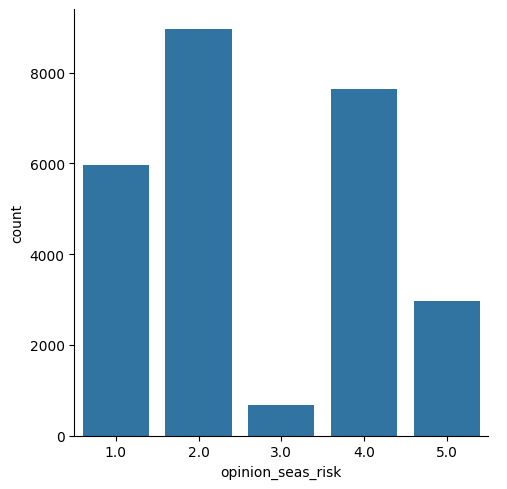

In [123]:
sns.catplot(x='opinion_seas_risk', data = features, kind = "count")

Most lean towards thinking the risk of seasonal vaccine are somewhat low.

In [124]:
features.opinion_seas_sick_from_vacc.value_counts()

,count
opinion_seas_sick_from_vacc,
1.0,11870
2.0,7633
4.0,4852
5.0,1721
3.0,94


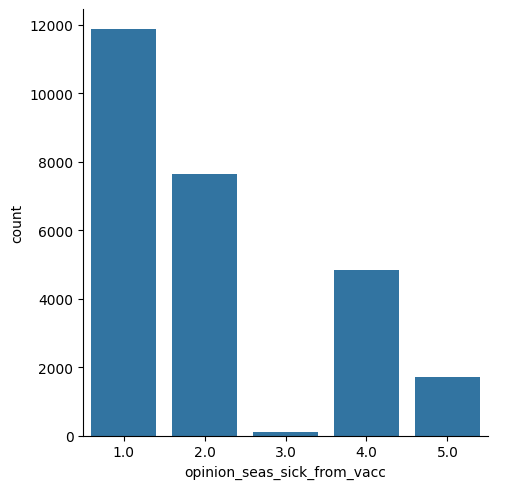

In [125]:
sns.catplot(x='opinion_seas_sick_from_vacc', data = features, kind = "count")

Most people are not at all worried of getting sick from seasonal vaccine.

Visualising labels

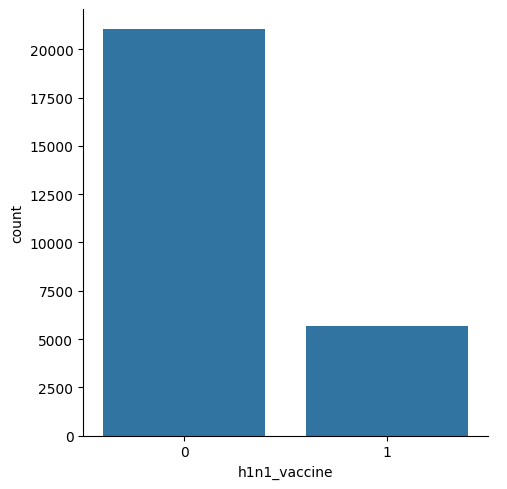

In [126]:
sns.catplot(x='h1n1_vaccine', data = labels, kind = "count")

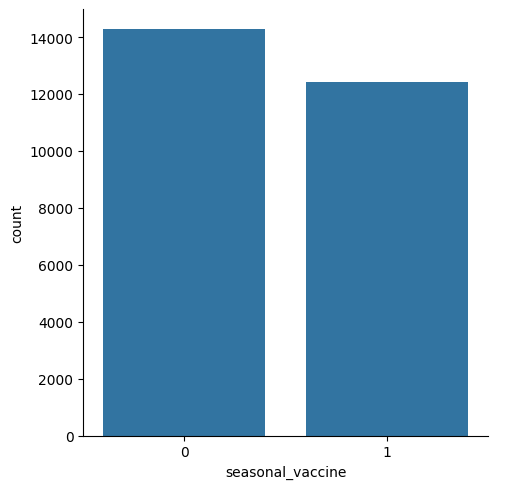

In [127]:
sns.catplot(x='seasonal_vaccine', data = labels, kind = "count")

Feature scaling and selection

In [128]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [129]:
features = pd.DataFrame(features)
col_name = ['respondent_id','h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']
features.columns = col_name

In [130]:
X = features
y = labels

Applying SelectKBest class

In [131]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [132]:
# Assuming 'seasonal_vaccine' is the target column in your 'labels' DataFrame
y = labels['seasonal_vaccine']

# Create a SimpleImputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back to a pandas DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Ensure X_imputed and y have the same number of samples
X_imputed = X_imputed.iloc[:len(y)]  # Trim X_imputed to match y's length

# Now, use the imputed data for feature selection with the single target variable
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X_imputed, y)

In [133]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))

                          Specs        Score
11         doctor_recc_seasonal  2066.049373
20            opinion_seas_risk  1090.995003
10             doctor_recc_h1n1   695.512437
12        chronic_med_condition   515.154497
22                    age_group   499.304406
17            opinion_h1n1_risk   374.663138
14                health_worker   361.872933
19  opinion_seas_vacc_effective   329.551343
33           household_children   185.052479
9         behavioral_touch_face   123.394755
28                  rent_or_own   113.833924
1                  h1n1_concern   108.507754
16  opinion_h1n1_vacc_effective    97.095665
25                          sex    94.243768
7   behavioral_large_gatherings    69.756457
5          behavioral_face_mask    62.279296
6         behavioral_wash_hands    58.670400
2                h1n1_knowledge    57.835202
8       behavioral_outside_home    50.361891
4          behavioral_avoidance    42.103587
21  opinion_seas_sick_from_vacc    38.564245
15        

In [134]:
features_kbest = features.iloc[:,[9,10,19,16,13,11,21,18,15,34,0,33,32,8,12,1,24,5,26,17,6,3,7,2,4]]

Feature importance using ExtraTrees Classifier

[0.03482261 0.02747776 0.02429034 0.00730949 0.01597161 0.00833273
 0.01151028 0.01691146 0.01678913 0.0163068  0.02525377 0.08680878
 0.0192829  0.00979594 0.01553801 0.02655186 0.02940729 0.03194509
 0.02645115 0.07769699 0.09242527 0.02945557 0.06097711 0.02656745
 0.01899199 0.01830099 0.02374947 0.01858419 0.01750859 0.0157029
 0.03271683 0.02580873 0.02320657 0.02028064 0.02333067 0.02393903]


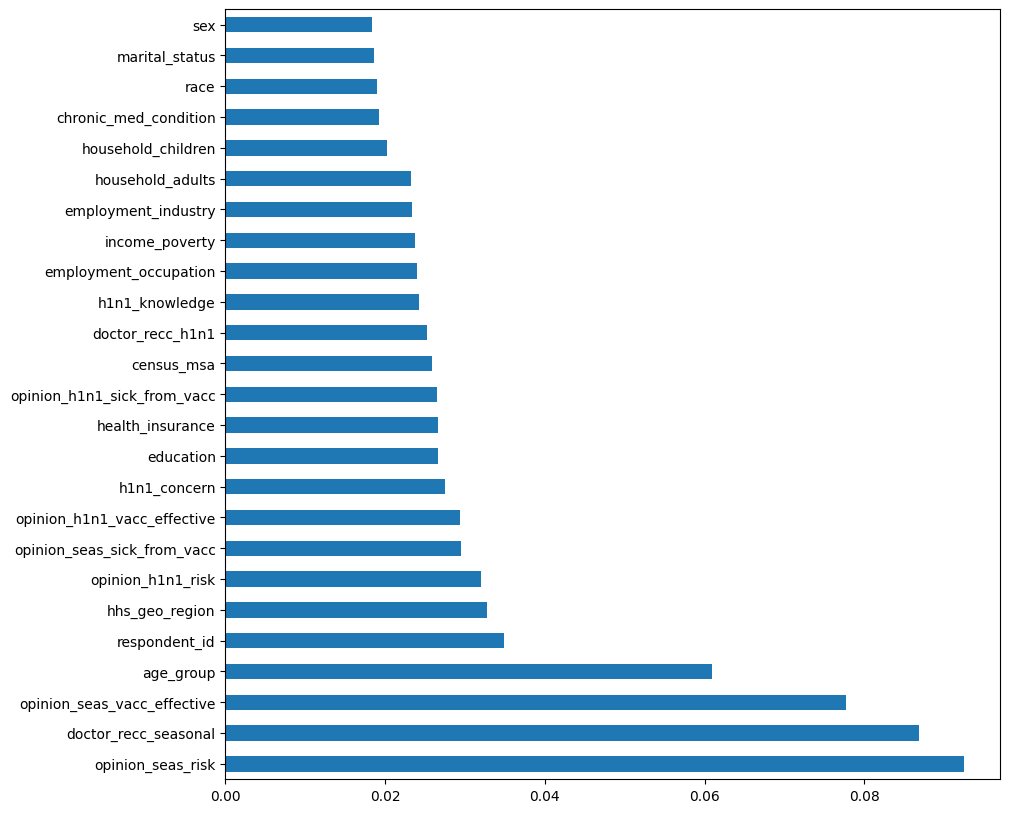

In [135]:
model = ExtraTreesClassifier()
model.fit(X_imputed,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [136]:
features_tree = features.loc[:,['opinion_seas_risk','doctor_recc_seasonal','opinion_seas_vacc_effective',
                                 'doctor_recc_h1n1','age_group','opinion_h1n1_risk','hhs_geo_region',
                                 'opinion_h1n1_vacc_effective','h1n1_concern','opinion_seas_sick_from_vacc',
                                 'opinion_h1n1_sick_from_vacc','census_msa','education','income_poverty',
                                 'h1n1_knowledge','household_adults','employment_occupation',
                                 'employment_industry','household_children','sex','race','marital_status',
                                 'rent_or_own','behavioral_outside_home','behavioral_large_gatherings']]

Correlation Matrix using Heatmap

In [137]:
features.corrwith(labels.h1n1_vaccine)

,0
respondent_id,-0.003280
h1n1_concern,0.121929
h1n1_knowledge,0.117951
behavioral_antiviral_meds,0.040608
behavioral_avoidance,0.047690
behavioral_face_mask,0.070498
behavioral_wash_hands,0.074712
behavioral_large_gatherings,0.017822
behavioral_outside_home,0.021768
behavioral_touch_face,0.071648


In [138]:
features.corrwith(labels.seasonal_vaccine)

,0
respondent_id,-0.004652
h1n1_concern,0.154828
h1n1_knowledge,0.120152
behavioral_antiviral_meds,0.006277
behavioral_avoidance,0.076395
behavioral_face_mask,0.050083
behavioral_wash_hands,0.112414
behavioral_large_gatherings,0.064025
behavioral_outside_home,0.053509
behavioral_touch_face,0.120228


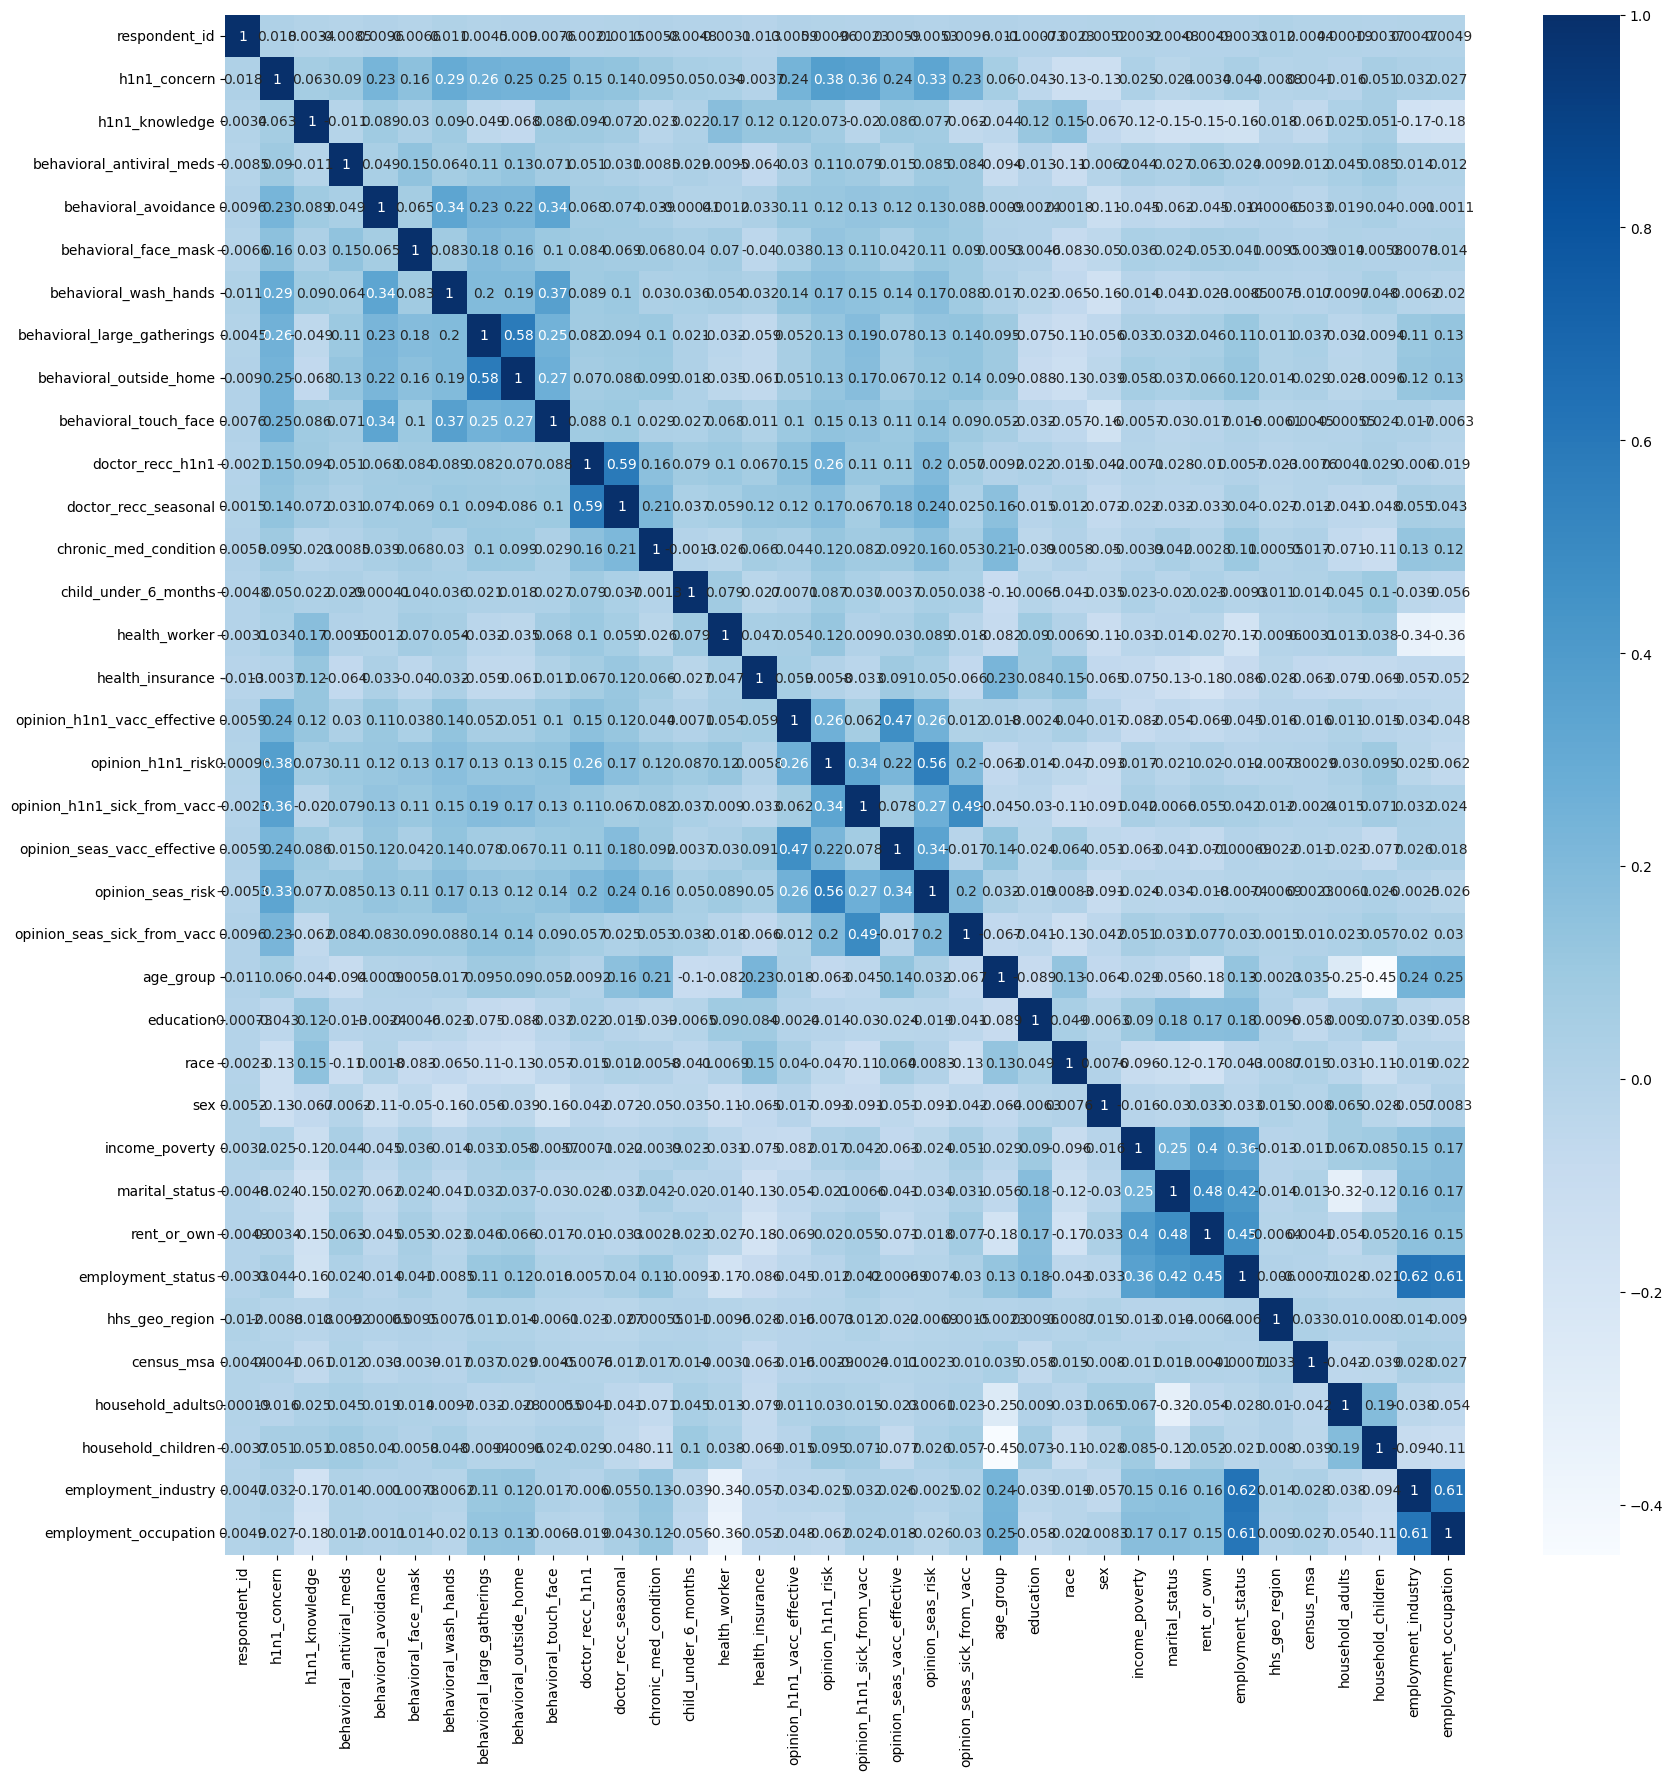

In [139]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Blues")

In [140]:
data.drop(['respondent_id'], axis = 1,inplace=True)

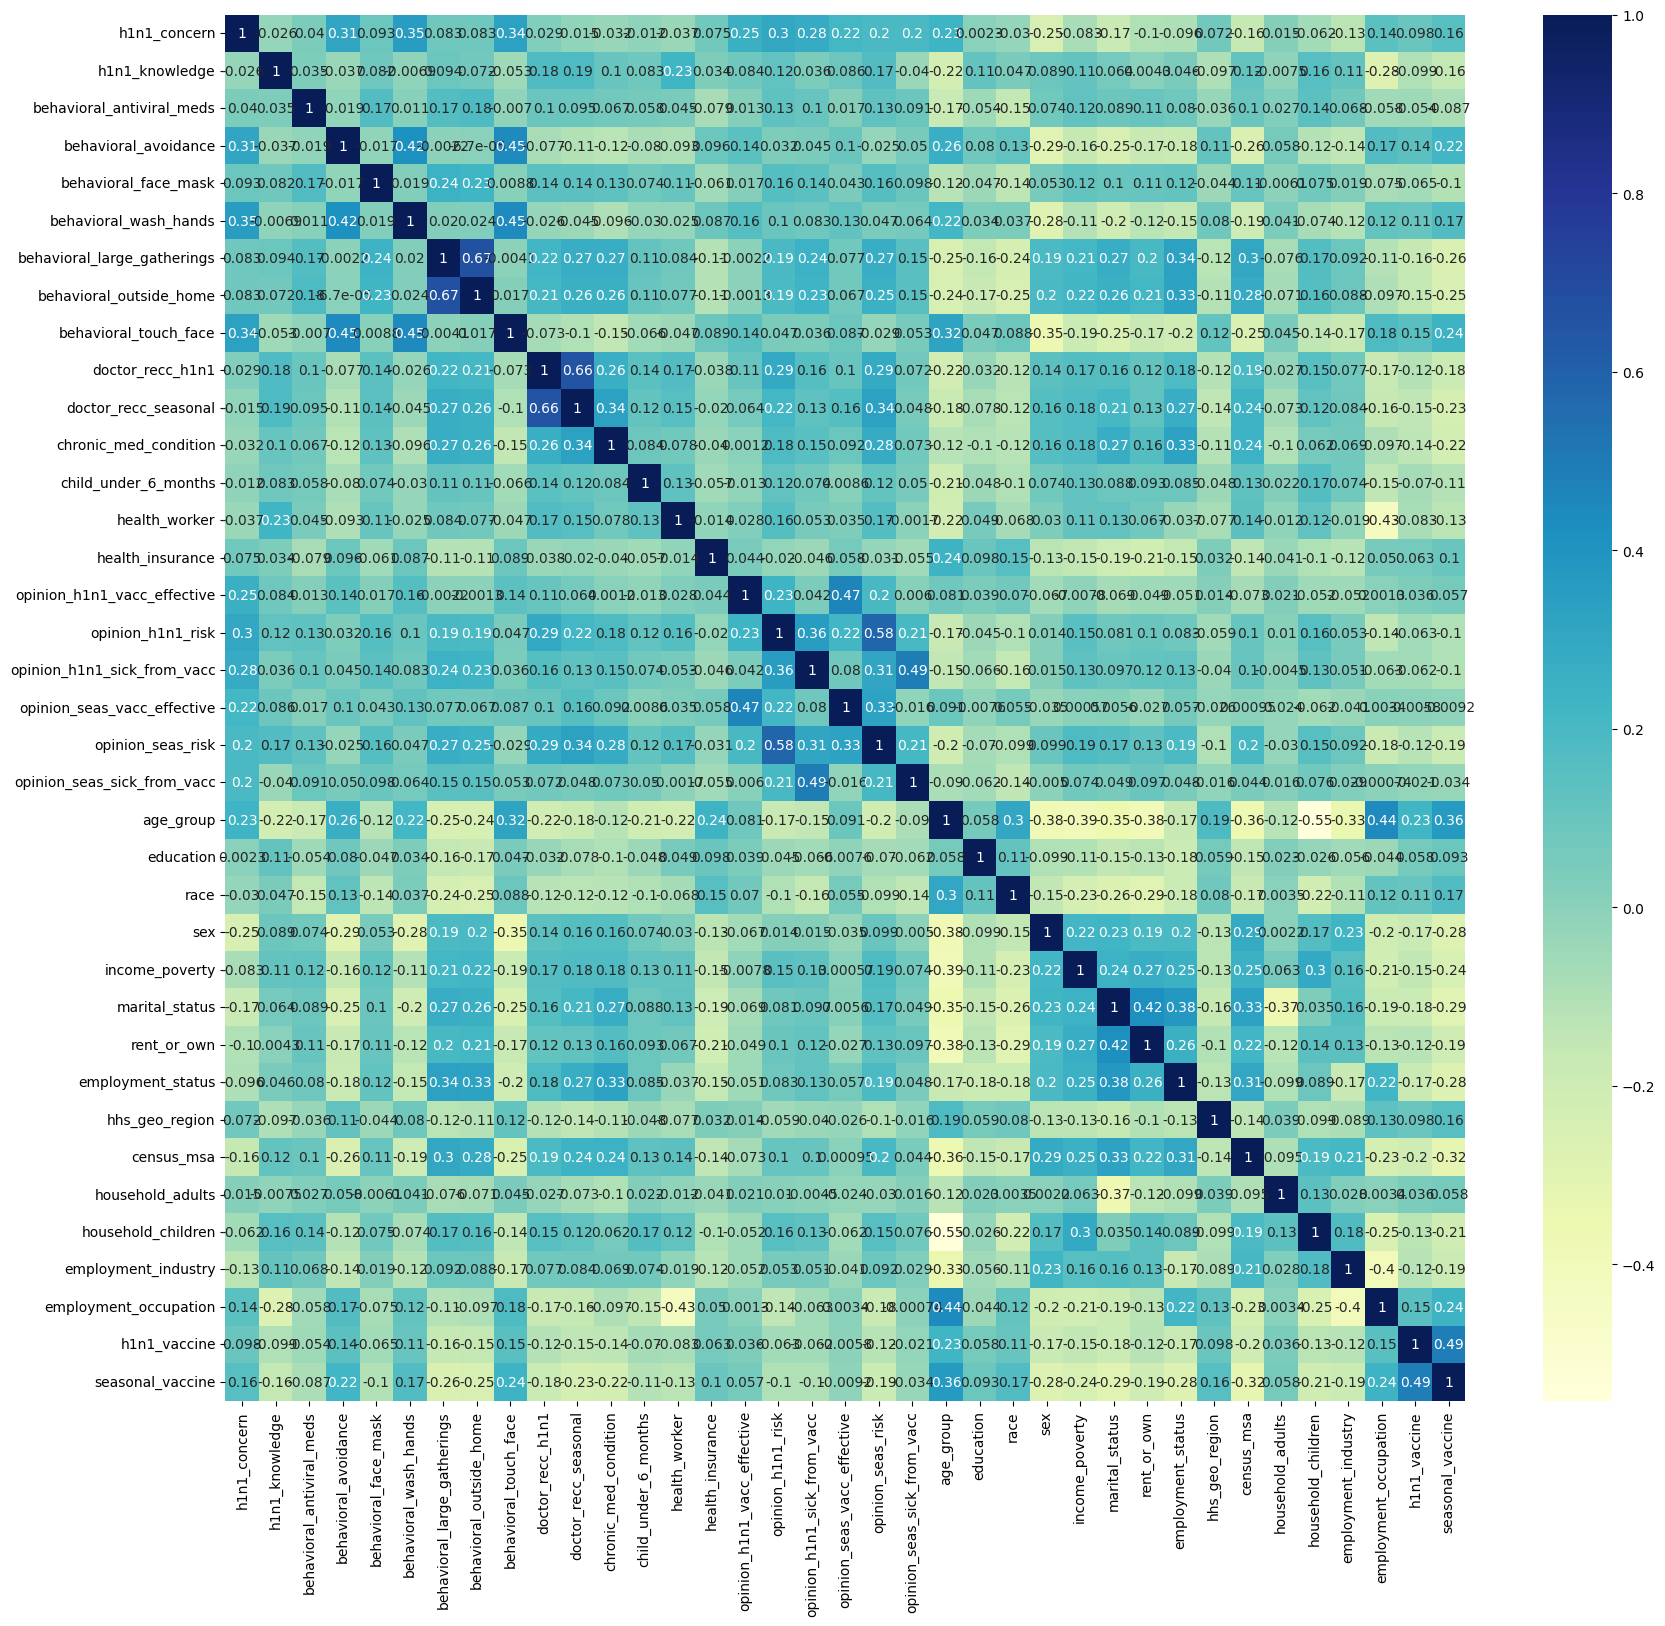

In [141]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()



behavioral_outside_home and behavioral_large_gatherings are highly correlated. One of them would be dropped. Similarly, doctor_recc_h1n1 and doctor_recc_seasonal are highly correlated. One of them would be dropped again.


In [142]:
# Check if the columns exist in the DataFrame before dropping
if 'behavioral_outside_home' in data.columns and 'doctor_recc_h1n1' in data.columns:
    data.drop(['behavioral_outside_home','doctor_recc_h1n1'], axis = 1,inplace=True)
else:
    print("Columns 'behavioral_outside_home' and/or 'doctor_recc_h1n1' not found in DataFrame.")
    # You can print the existing columns for verification
    print("Existing columns:", data.columns)

In [143]:
features.drop(['opinion_seas_sick_from_vacc','hhs_geo_region','census_msa',
               'household_adults','household_children','behavioral_antiviral_meds',
               'education'], axis = 1, inplace = True)

Encoding using Label encoding to the categorical data

In [144]:
enc = LabelEncoder()
data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']].apply(enc.fit_transform)

data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,1,3,0,2,1,0,1,8,2,4,21
1,1,0,3,1,2,1,1,0,1,0,12,19
2,0,2,3,1,0,1,0,0,9,0,14,21
3,4,0,3,0,2,1,1,1,5,1,4,21
4,2,3,3,0,0,0,0,0,9,0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...
53409,4,2,3,0,0,0,0,0,6,0,4,21
53410,4,2,3,0,0,0,0,0,6,0,4,21
53411,4,2,3,0,0,0,0,0,6,0,4,21
53412,4,2,3,0,0,0,0,0,6,0,4,21


In [145]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,8,2,0.0,0.0,4,21,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.0,0.0,12,19,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,9,0,2.0,0.0,14,21,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1,1,5,1,0.0,0.0,4,21,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,9,0,1.0,0.0,18,5,0.0,0.0






# Model Selection

Model Creation

In [146]:
x=data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)
y=data[['h1n1_vaccine','seasonal_vaccine']]

Splitting the data into training and testing data

In [147]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((10682, 33), (42732, 33), (10682, 2), (42732, 2))

Feature Scaling

In [148]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [149]:
# Import the necessary classes from tensorflow.keras.layers
from tensorflow.keras.layers import Input, Dense # Import Dense

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layers
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)

# Output layer for H1N1 vaccine
output_layer_h1n1 = Dense(1, activation='sigmoid', name='h1n1_vaccine')(hidden_layer2)

# Output layer for Seasonal vaccine
output_layer_seasonal = Dense(1, activation='sigmoid', name='seasonal_vaccine')(hidden_layer2)

# Create the model
from tensorflow.keras.models import Model # Import Model if not already imported
model = Model(inputs=input_layer, outputs=[output_layer_h1n1, output_layer_seasonal])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model

**Using Binary Relevance**

In [150]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [151]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

Logistic Regression

In [152]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[['accuracy'], ['accuracy']]  # Provide a list of metrics for each output
)

model.fit(
    X_train,
    [y_train['h1n1_vaccine'], y_train['seasonal_vaccine']],
    epochs=10,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - h1n1_vaccine_accuracy: 0.8934 - h1n1_vaccine_loss: 0.3618 - loss: 0.8851 - seasonal_vaccine_accuracy: 0.7084 - seasonal_vaccine_loss: 0.5232 - val_h1n1_vaccine_accuracy: 0.8919 - val_h1n1_vaccine_loss: 0.2623 - val_loss: 0.6163 - val_seasonal_vaccine_accuracy: 0.7674 - val_seasonal_vaccine_loss: 0.3535
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - h1n1_vaccine_accuracy: 0.8994 - h1n1_vaccine_loss: 0.2567 - loss: 0.6200 - seasonal_vaccine_accuracy: 0.7541 - seasonal_vaccine_loss: 0.3633 - val_h1n1_vaccine_accuracy: 0.8919 - val_h1n1_vaccine_loss: 0.2851 - val_loss: 0.6316 - val_seasonal_vaccine_accuracy: 0.7674 - val_seasonal_vaccine_loss: 0.3461
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - h1n1_vaccine_accuracy: 0.8988 - h1n1_vaccine_loss: 0.2553 - loss: 0.6047 - seasonal_vaccine_accuracy: 0.7663 - seasonal_vaccine_loss: 0.3493 - val_h1n1_vaccine_accuracy: 0.8919 - val_h1n1_vaccine_loss: 0.2647 - val_loss: 0.6021 - 

Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Step 3: Train a Random Forest classifier for h1n1_vaccine
model_h1n1_rf = RandomForestClassifier()
model_h1n1_rf.fit(X_train, y_train['h1n1_vaccine'])

# Step 3: Train a Random Forest classifier for seasonal_vaccine
model_seasonal_rf = RandomForestClassifier()
model_seasonal_rf.fit(X_train, y_train['seasonal_vaccine'])

# Step 4: Make predictions on the test data
y_pred_h1n1_rf = model_h1n1_rf.predict(X_test)
y_pred_seasonal_rf = model_seasonal_rf.predict(X_test)

# Step 5: Calculate and print accuracy, precision, and recall for h1n1_vaccine
accuracy_h1n1_rf = accuracy_score(y_test['h1n1_vaccine'], y_pred_h1n1_rf)
precision_h1n1_rf = precision_score(y_test['h1n1_vaccine'], y_pred_h1n1_rf)
recall_h1n1_rf = recall_score(y_test['h1n1_vaccine'], y_pred_h1n1_rf)

print("h1n1_vaccine Random Forest Metrics:")
print("Accuracy:", accuracy_h1n1_rf)
print("Precision:", precision_h1n1_rf)
print("Recall:", recall_h1n1_rf)

# Step 5: Calculate and print accuracy, precision, and recall for seasonal_vaccine
accuracy_seasonal_rf = accuracy_score(y_test['seasonal_vaccine'], y_pred_seasonal_rf)
precision_seasonal_rf = precision_score(y_test['seasonal_vaccine'], y_pred_seasonal_rf)
recall_seasonal_rf = recall_score(y_test['seasonal_vaccine'], y_pred_seasonal_rf)

print("\nseasonal_vaccine Random Forest Metrics:")
print("Accuracy:", accuracy_seasonal_rf)
print("Precision:", precision_seasonal_rf)
print("Recall:", recall_seasonal_rf)

h1n1_vaccine Random Forest Metrics:
Accuracy: 0.893733033792006
Precision: 0.0
Recall: 0.0

seasonal_vaccine Random Forest Metrics:
Accuracy: 0.7678788729757559
Precision: 0.0
Recall: 0.0


**Using Classifier Chains**

Logistic Regression

In [154]:
# Two separate models are created and trained for h1n1_vaccine and seasonal_vaccine.
# If dealing with two targets (h1n1_vaccine and seasonal_vaccine), you need to fit separate models for each.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Step 3: Train a Logistic Regression classifier for h1n1_vaccine
model_h1n1 = LogisticRegression()
model_h1n1.fit(X_train, y_train['h1n1_vaccine'])

# Step 3: Train a Logistic Regression classifier for seasonal_vaccine
model_seasonal = LogisticRegression()
model_seasonal.fit(X_train, y_train['seasonal_vaccine'])

# Step 4: Make predictions on the test data
y_pred_h1n1 = model_h1n1.predict(X_test)
y_pred_seasonal = model_seasonal.predict(X_test)

# Step 5: Calculate and print accuracy, precision, and recall for h1n1_vaccine
accuracy_h1n1 = accuracy_score(y_test['h1n1_vaccine'], y_pred_h1n1)
precision_h1n1 = precision_score(y_test['h1n1_vaccine'], y_pred_h1n1)
recall_h1n1 = recall_score(y_test['h1n1_vaccine'], y_pred_h1n1)

print("h1n1_vaccine Metrics:")
print("Accuracy:", accuracy_h1n1)
print("Precision:", precision_h1n1)
print("Recall:", recall_h1n1)

# Step 5: Calculate and print accuracy, precision, and recall for seasonal_vaccine
accuracy_seasonal = accuracy_score(y_test['seasonal_vaccine'], y_pred_seasonal)
precision_seasonal = precision_score(y_test['seasonal_vaccine'], y_pred_seasonal)
recall_seasonal = recall_score(y_test['seasonal_vaccine'], y_pred_seasonal)

print("\nseasonal_vaccine Metrics:")
print("Accuracy:", accuracy_seasonal)
print("Precision:", precision_seasonal)
print("Recall:", recall_seasonal)

h1n1_vaccine Metrics:
Accuracy: 0.8937096321258073
Precision: 0.0
Recall: 0.0

seasonal_vaccine Metrics:
Accuracy: 0.7677384629785641
Precision: 0.0
Recall: 0.0


Decision Tree

In [155]:
#Two separate instances of DecisionTreeClassifier are created for each target variable.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Step 3: Train a Decision Tree classifier for h1n1_vaccine
model_h1n1_dt = DecisionTreeClassifier()
model_h1n1_dt.fit(X_train, y_train['h1n1_vaccine'])

# Step 3: Train a Decision Tree classifier for seasonal_vaccine
model_seasonal_dt = DecisionTreeClassifier()
model_seasonal_dt.fit(X_train, y_train['seasonal_vaccine'])

# Step 4: Make predictions on the test data
y_pred_h1n1_dt = model_h1n1_dt.predict(X_test)
y_pred_seasonal_dt = model_seasonal_dt.predict(X_test)

# Step 5: Calculate and print accuracy, precision, and recall for h1n1_vaccine
accuracy_h1n1_dt = accuracy_score(y_test['h1n1_vaccine'], y_pred_h1n1_dt)
precision_h1n1_dt = precision_score(y_test['h1n1_vaccine'], y_pred_h1n1_dt)
recall_h1n1_dt = recall_score(y_test['h1n1_vaccine'], y_pred_h1n1_dt)

print("h1n1_vaccine Decision Tree Metrics:")
print("Accuracy:", accuracy_h1n1_dt)
print("Precision:", precision_h1n1_dt)
print("Recall:", recall_h1n1_dt)

# Step 5: Calculate and print accuracy, precision, and recall for seasonal_vaccine
accuracy_seasonal_dt = accuracy_score(y_test['seasonal_vaccine'], y_pred_seasonal_dt)
precision_seasonal_dt = precision_score(y_test['seasonal_vaccine'], y_pred_seasonal_dt)
recall_seasonal_dt = recall_score(y_test['seasonal_vaccine'], y_pred_seasonal_dt)

print("\nseasonal_vaccine Decision Tree Metrics:")
print("Accuracy:", accuracy_seasonal_dt)
print("Precision:", precision_seasonal_dt)
print("Recall:", recall_seasonal_dt)

h1n1_vaccine Decision Tree Metrics:
Accuracy: 0.893733033792006
Precision: 0.0
Recall: 0.0

seasonal_vaccine Decision Tree Metrics:
Accuracy: 0.7678788729757559
Precision: 0.0
Recall: 0.0


**Using Label Powerset**

Naive Bayes

In [156]:
#We use GaussianNB for a Naive Bayes classifier suitable for continuous features.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Step 3: Train a Naive Bayes classifier for h1n1_vaccine
model_h1n1_nb = GaussianNB()
model_h1n1_nb.fit(X_train, y_train['h1n1_vaccine'])

# Step 3: Train a Naive Bayes classifier for seasonal_vaccine
model_seasonal_nb = GaussianNB()
model_seasonal_nb.fit(X_train, y_train['seasonal_vaccine'])

# Step 4: Make predictions on the test data
y_pred_h1n1_nb = model_h1n1_nb.predict(X_test)
y_pred_seasonal_nb = model_seasonal_nb.predict(X_test)

# Step 5: Calculate and print accuracy, precision, and recall for h1n1_vaccine
accuracy_h1n1_nb = accuracy_score(y_test['h1n1_vaccine'], y_pred_h1n1_nb)
precision_h1n1_nb = precision_score(y_test['h1n1_vaccine'], y_pred_h1n1_nb)
recall_h1n1_nb = recall_score(y_test['h1n1_vaccine'], y_pred_h1n1_nb)

print("h1n1_vaccine Naive Bayes Metrics:")
print("Accuracy:", accuracy_h1n1_nb)
print("Precision:", precision_h1n1_nb)
print("Recall:", recall_h1n1_nb)

# Step 5: Calculate and print accuracy, precision, and recall for seasonal_vaccine
accuracy_seasonal_nb = accuracy_score(y_test['seasonal_vaccine'], y_pred_seasonal_nb)
precision_seasonal_nb = precision_score(y_test['seasonal_vaccine'], y_pred_seasonal_nb)
recall_seasonal_nb = recall_score(y_test['seasonal_vaccine'], y_pred_seasonal_nb)

print("\nseasonal_vaccine Naive Bayes Metrics:")
print("Accuracy:", accuracy_seasonal_nb)
print("Precision:", precision_seasonal_nb)
print("Recall:", recall_seasonal_nb)

h1n1_vaccine Naive Bayes Metrics:
Accuracy: 0.6047458579050828
Precision: 0.21188931921048948
Recall: 1.0

seasonal_vaccine Naive Bayes Metrics:
Accuracy: 0.730600018721333
Precision: 0.4628342121226261
Recall: 1.0


# Validate the performance of the model - Performance Metrics

Accuracy score comparison chart

In [157]:
import numpy as np
import tensorflow as tf

# Convert X_test to a NumPy array if it's a TensorFlow tensor or a Pandas DataFrame
X_test_np = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test
# If X_test was already a NumPy array, this line won't change it

# Explicitly convert X_test_np to a TensorFlow tensor with a defined shape
X_test_tensor = tf.convert_to_tensor(X_test_np, dtype=tf.float32)

# Assuming 'y_test' is your DataFrame or array containing the target values:
y_test_values = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test
# Convert to NumPy array if necessary

# Reshape y_test_values slices to have a defined shape
y_test_0 = tf.reshape(y_test_values[:, 0], [-1, 1])  # Reshape to (num_samples, 1)
y_test_1 = tf.reshape(y_test_values[:, 1], [-1, 1])  # Reshape to (num_samples, 1)

# Proceed with the evaluation, using the TensorFlow tensor and reshaped targets
model.evaluate(X_test_tensor, [y_test_0, y_test_1])

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - h1n1_vaccine_accuracy: 0.8967 - h1n1_vaccine_loss: 0.2652 - loss: 0.6125 - seasonal_vaccine_accuracy: 0.7297 - seasonal_vaccine_loss: 0.3473


[0.6166454553604126,
 0.26839059591293335,
 0.3483259081840515,
 0.893733024597168,
 0.7305999994277954]

Predicting Probabilities

In [158]:
# Predict probabilities for H1N1 and seasonal flu vaccines
predictions = model.predict(X_test)

#H1N1 vaccine probabilities
h1n1_probabilities = predictions[0][:, 0] # Access the first element (H1N1 predictions) then slice

#Seasonal flu vaccine probabilities
seasonal_probabilities = predictions[1][:, 0] # Access the second element (seasonal predictions) then slice

# Output the predicted probabilities
for i in range(5):
    print(f"Sample {i + 1}:")
    print(f"H1N1 Vaccine Probability: {h1n1_probabilities[i]:.4f}, Seasonal Flu Vaccine Probability: {seasonal_probabilities[i]:.4f}")

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Sample 1:
H1N1 Vaccine Probability: 0.0000, Seasonal Flu Vaccine Probability: 0.0000
Sample 2:
H1N1 Vaccine Probability: 0.2963, Seasonal Flu Vaccine Probability: 0.5054
Sample 3:
H1N1 Vaccine Probability: 0.0000, Seasonal Flu Vaccine Probability: 0.0000
Sample 4:
H1N1 Vaccine Probability: 0.2963, Seasonal Flu Vaccine Probability: 0.5054
Sample 5:
H1N1 Vaccine Probability: 0.2963, Seasonal Flu Vaccine Probability: 0.5054
